In [12]:
import pandas as pd 
data = pd.read_csv('titanic-passengers.csv', sep=';')
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0})   #convert admitted variable into numerical

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [55]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[['Pclass', 'SibSp','Parch']]
y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.66


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


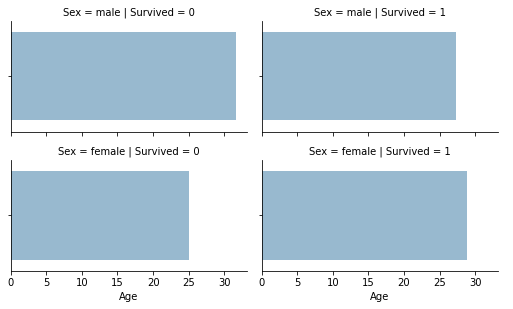

In [35]:
import seaborn as sns

grid = sns.FacetGrid(data, row="Sex", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Age', alpha=.5, ci=None)
grid.add_legend()

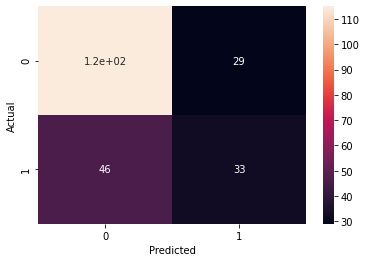

In [15]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**The Receiver Operator Characteristic (ROC)** curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. **The Area Under the Curve (AUC)** is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

In [52]:
x = data["Survived"].values
y = data["Sex"].values

In [82]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [77]:

X = data['Fare'].values.reshape(-1, 1)
y =data['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
lr = LogisticRegression()

lr.fit(X_train, y_train)
preds = lr.predict(X_test)



In [83]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 86
False Positives: 137
True Negatives: 0
False Negatives: 0


0.5

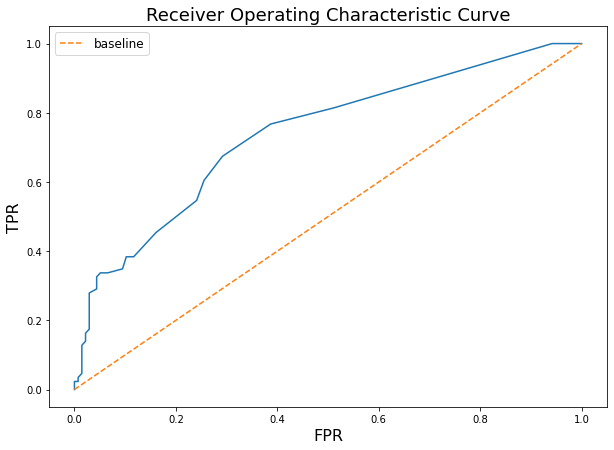

In [84]:
probas = lr.predict_proba(X_test)[:, 1]

def get_preds(threshold, probabilities):
  return [1 if prob > threshold else 0 for prob in probabilities]

roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

roc_auc_score(y_test, preds)

